# Get & Assess Shoreline JSONs

Consider the root Axiom staging path:

`f'https://stage-ams.srv.axds.co/archive/jsonl/noaa/{station_name}/{self.date}'`

We want to obtain the metadata from similar archives. Some examples are as follows:

- **Station:** `currituck_hampton_inn` – hourly shoreline data from 2024/08/08.
- **Station:** `oak_island_west` – JSON extraction (different format) is in development; data is in image-embedded JSONs for each 10-minute segment.

`GetShorelineJSONS` extracts and processes JSONs for specified stations.


In [1]:
from get_shoreline_jsons import *

In [2]:
station_name = 'currituck_hampton_inn' # this location contains hourly shoreline data beginning 2024/08/08
get_shoreline_jsons = GetShorelineJSONS(station_name)


In [3]:
print(get_shoreline_jsons.station_url)
get_shoreline_jsons.set_date('2024/08/10/')
print(get_shoreline_jsons.station_url)


https://stage-ams.srv.axds.co/archive/jsonl/noaa/currituck_hampton_inn//2024/08/08/
https://stage-ams.srv.axds.co/archive/jsonl/noaa/currituck_hampton_inn/2024/08/10/


In [4]:
get_shoreline_jsons.get_response()
print(f'Response Statuse Code: {get_shoreline_jsons.response.status_code}')
get_shoreline_jsons.get_content()


Response Statuse Code: 200


In [5]:
get_shoreline_jsons.get_json_refs()
print(get_shoreline_jsons.json_refs)
print(get_shoreline_jsons.station_url + get_shoreline_jsons.json_refs[3])
get_shoreline_jsons.get_json(get_shoreline_jsons.json_refs[3])
print(get_shoreline_jsons.json_content)


['annotated.shoreline_otsu.v1.timex.currituck_hampton_inn-2024-08-10-101539Z.jsonl', 'annotated.shoreline_otsu.v1.timex.currituck_hampton_inn-2024-08-10-110538Z.jsonl', 'annotated.shoreline_otsu.v1.timex.currituck_hampton_inn-2024-08-10-120538Z.jsonl', 'annotated.shoreline_otsu.v1.timex.currituck_hampton_inn-2024-08-10-130538Z.jsonl', 'annotated.shoreline_otsu.v1.timex.currituck_hampton_inn-2024-08-10-140538Z.jsonl', 'annotated.shoreline_otsu.v1.timex.currituck_hampton_inn-2024-08-10-150538Z.jsonl', 'annotated.shoreline_otsu.v1.timex.currituck_hampton_inn-2024-08-10-160538Z.jsonl', 'annotated.shoreline_otsu.v1.timex.currituck_hampton_inn-2024-08-10-170546Z.jsonl', 'annotated.shoreline_otsu.v1.timex.currituck_hampton_inn-2024-08-10-180546Z.jsonl', 'annotated.shoreline_otsu.v1.timex.currituck_hampton_inn-2024-08-10-190546Z.jsonl', 'annotated.shoreline_otsu.v1.timex.currituck_hampton_inn-2024-08-10-200546Z.jsonl', 'annotated.shoreline_otsu.v1.timex.currituck_hampton_inn-2024-08-10-210546Z

In [6]:
get_shoreline_jsons.jsonref2filename(verbose=True)

First Filename Ref:
 currituck_hampton_inn-2024-08-10_1015.avg.slVars.json


In [7]:
get_shoreline_jsons.get_time_info()
get_shoreline_jsons.save_sljson(get_shoreline_jsons.json_refs[0], verbose=True)

c:\Users\Corey Dearing\Desktop\ShorelineProjectRepo\transect_jsons\currituck_hampton_inn
annotated.shoreline_otsu.v1.timex.currituck_hampton_inn-2024-08-10-101539Z.jsonl
file contents: <class 'dict'>


In [8]:
get_shoreline_jsons.get_shoreline_orientation()
print(get_shoreline_jsons.shoreline_orientation)


0


In [9]:
get_shoreline_jsons.get_time_info()
print(get_shoreline_jsons.time_info)


2024-08-10 13:21:32


In [10]:
get_shoreline_jsons.get_shoreline_points()
print(get_shoreline_jsons.shoreline_points)
print(get_shoreline_jsons.shoreline_points.index)


                     5    15   25   35   45   55   65   75   85   95   ...  \
2024-08-10 13:21:32  245  244  243  243  243  241  241  242  243  242  ...   

                     705  715  725  735  745  755  765  775  785  795  
2024-08-10 13:21:32  246  245  246  245  245  246  250  253  254  250  

[1 rows x 80 columns]
Index(['2024-08-10 13:21:32'], dtype='object')


In [11]:
get_shoreline_jsons.get_shorelines()
# print(get_shoreline_jsons.shorelines_df)
get_shoreline_jsons.shorelines_df.iloc[0:5, 0:5]

,5,15,25,35,45
2024-08-10 10:31:22,254,250,246,245,245
2024-08-10 11:21:25,235,235,235,235,235
2024-08-10 12:21:28,240,241,240,240,240
2024-08-10 13:21:32,245,244,243,243,243
2024-08-10 14:21:35,245,243,250,245,243


In [12]:
get_shoreline_jsons.build_date_range(pd.Timestamp('2024-08-08'), pd.Timestamp('2024-08-10'))
# get_shoreline_jsons.build_date_range(pd.Timestamp('2024-08-08'), pd.Timestamp('2024-09-08'))
print(get_shoreline_jsons.date_range)


['2024/08/08/', '2024/08/09/', '2024/08/10/']


In [13]:
get_shoreline_jsons.get_shorelines_date_range()
get_shoreline_jsons.shorelines_df.iloc[0:5, 0:5]

,5,15,25,35,45
2024-08-08 00:10:57,245,245,245,245,245
2024-08-08 10:26:15,244,244,244,245,245
2024-08-08 12:16:26,245,245,245,245,246
2024-08-08 13:16:33,249,250,249,249,250
2024-08-08 14:16:36,254,254,254,255,255


## Shoreline Smoothness (Metric for Quality Assessment)
### Smoothness Calculation Using Second Derivatives

This calculation derives a smoothness metric based on the norm of the second derivative, with values closer to zero indicating smoother rows.

#### First Derivative

The first derivative is computed using finite differences:
$$
f'(y) = \frac{\Delta x}{\Delta y}
$$

#### Second Derivative

The second derivative is computed as:
$$
f''(y) = \frac{\Delta f'(y)}{\Delta y}
$$

#### Smoothness Score

The smoothness score is the norm of the second derivative:
$$
\text{smoothness\_score} = \| f''(y) \|
$$

#### Normalization

To scale the scores between 0 and 1:
$$
\text{normalized\_score} = \frac{\text{smoothness\_score} - \min(\text{smoothness\_score})}{\max(\text{smoothness\_score}) - \min(\text{smoothness\_score})}
$$

Rows with scores closer to zero are smoother. Smoothness scores closer to 1 typically indicate time averaged image obstructions. A typical reason for poor shoreline extraction is light scattering such that the gradient followed by the otsu thresholding changes rapidly in magnitude and/or sign.


In [14]:
get_shoreline_jsons.compute_smoothness_for_slx().iloc[0:5,:]

,5,15,25,35,45,55,65,75,85,95,...,715,725,735,745,755,765,775,785,795,smoothness_score
2024-08-08 00:10:57,245,245,245,245,245,245,245,245,245,245,...,250,250,250,250,250,250,250,249,250,0.007670
2024-08-08 10:26:15,244,244,244,245,245,245,245,245,246,246,...,251,251,251,251,251,252,252,252,252,0.013038
2024-08-08 12:16:26,245,245,245,245,246,247,248,248,248,248,...,254,254,254,254,254,255,255,254,254,0.000000
2024-08-08 13:16:33,249,250,249,249,250,250,250,250,250,250,...,256,257,257,257,256,257,257,257,257,0.019371
2024-08-08 14:16:36,254,254,254,255,255,252,254,253,252,252,...,245,244,245,247,252,255,257,259,262,0.067228


In [15]:
get_shoreline_jsons.slx['smoothness_score'].describe() # Smoothness score is a measure of the smoothness of the shoreline


count    42.000000
mean      0.175531
std       0.261499
min       0.000000
25%       0.019538
50%       0.050285
75%       0.197478
max       1.000000
Name: smoothness_score, dtype: float64

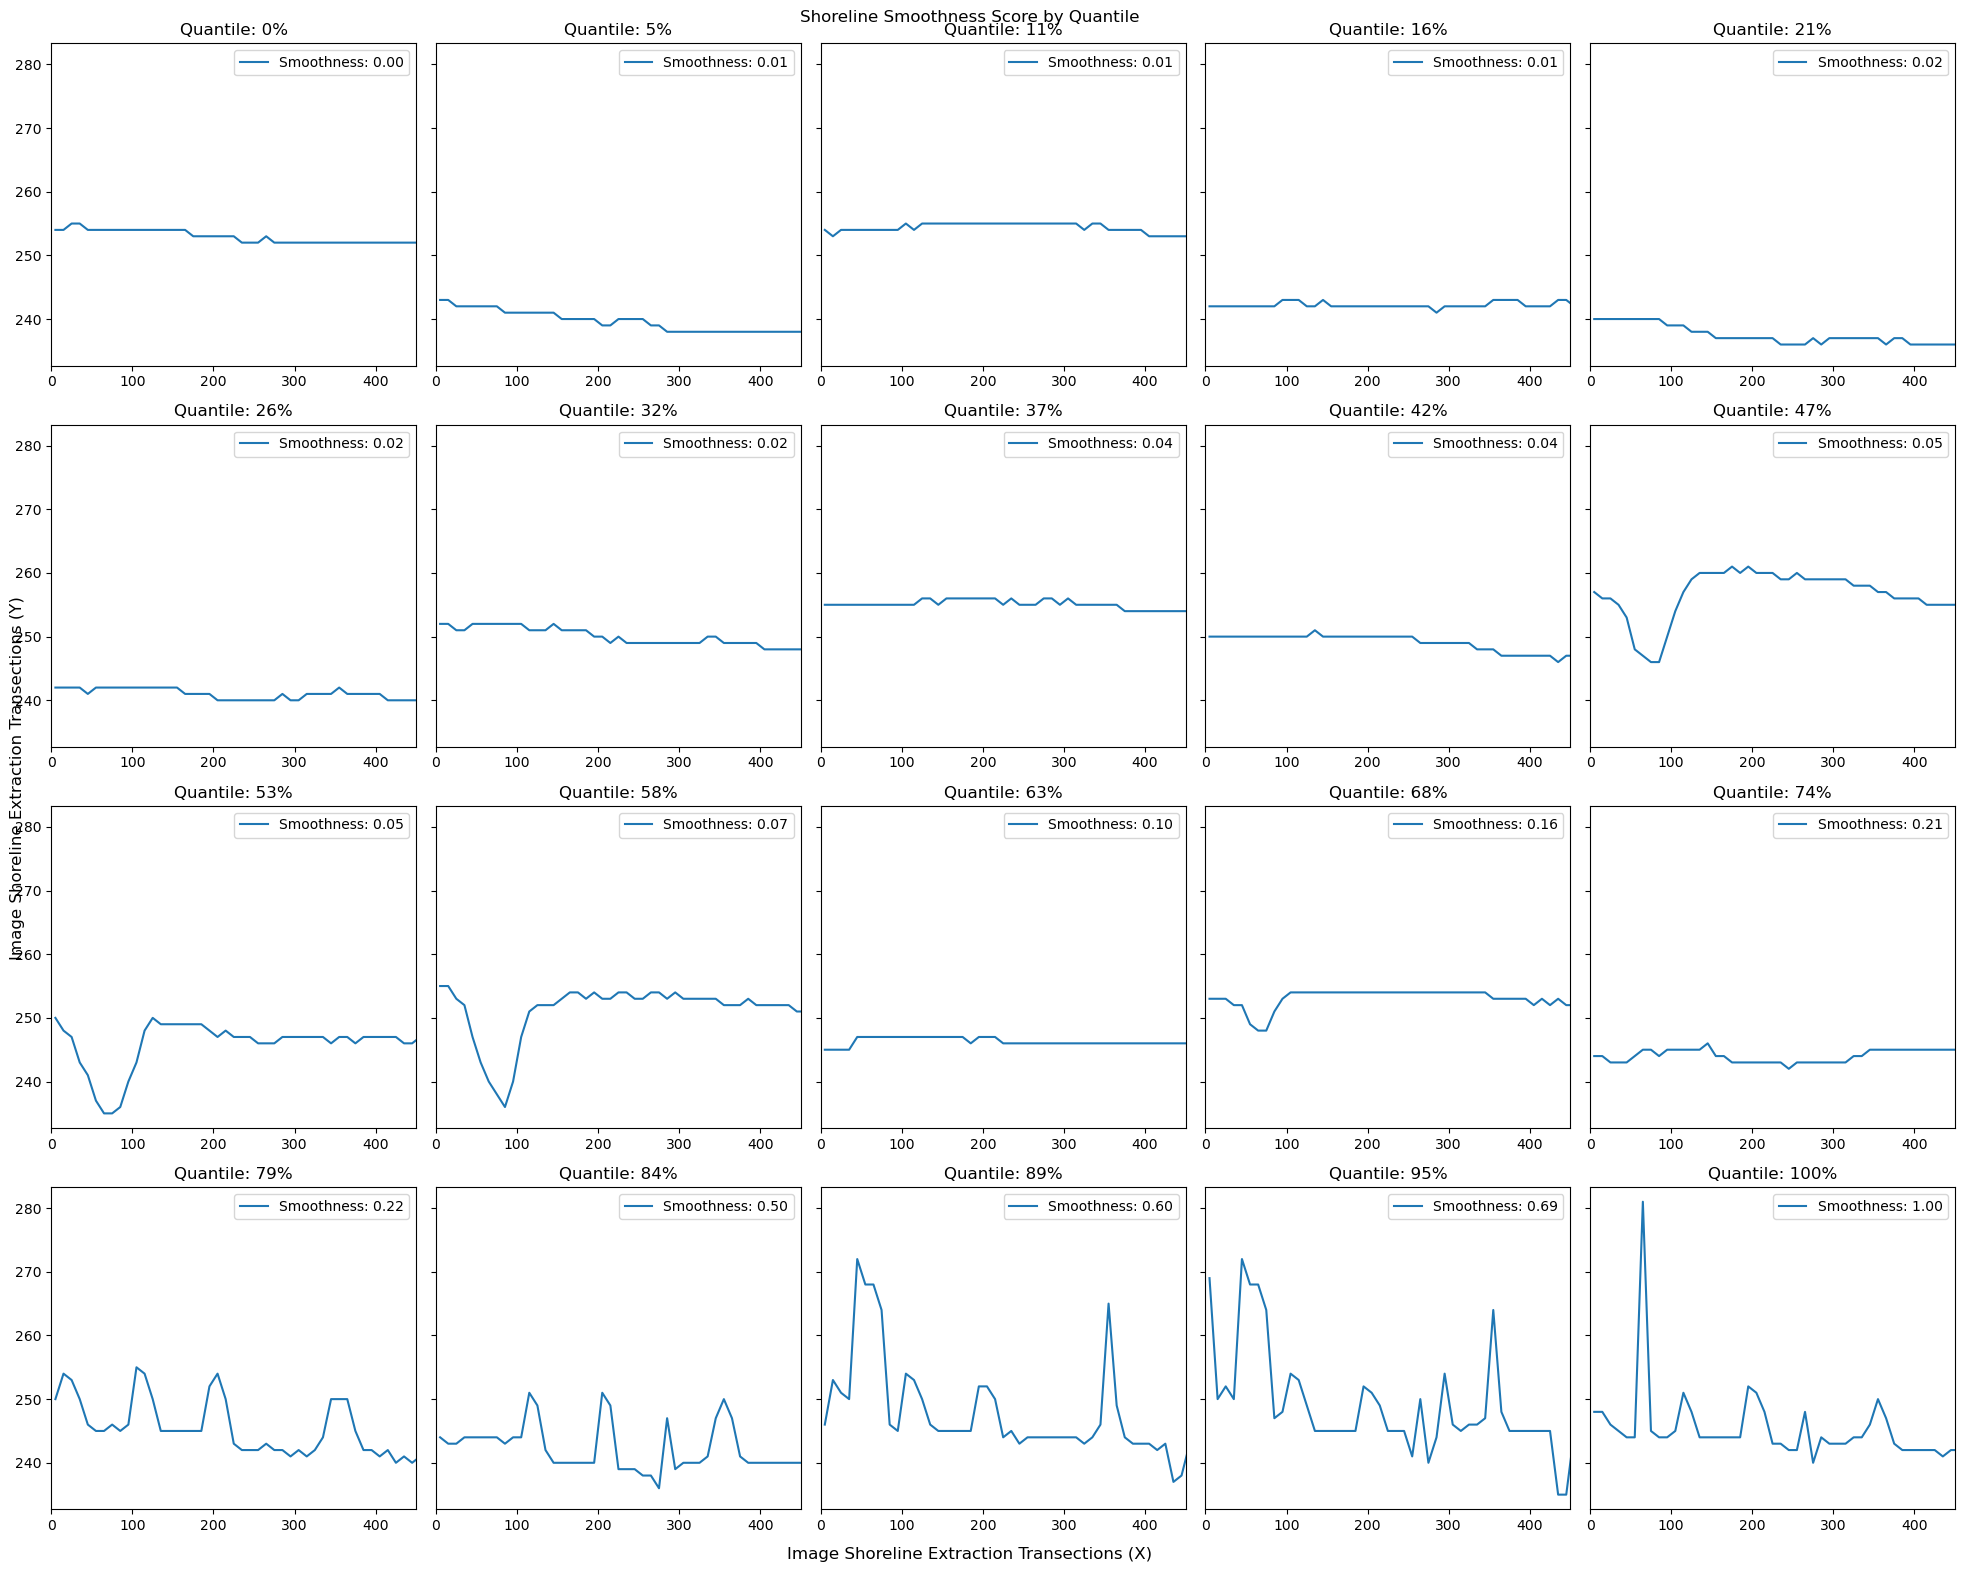

In [16]:
get_shoreline_jsons.plot_smoothness_by_quantile()